In [ ]:
import mne

In [ ]:
import pathlib

In [ ]:
import matplotlib

In [ ]:
#matplotlib.use('Qt5Agg')

In [ ]:
raw = mne.io.read_raw_eeglab('sub-AB6_task-gonogo_run-1_eeg.set', eog=(), preload=False, uint16_codec=None, verbose=None)

In [ ]:
raw.plot();

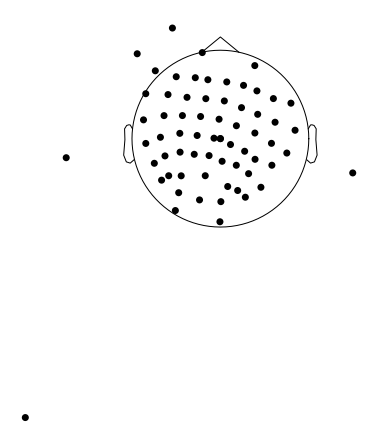

In [7]:
raw.plot_sensors(ch_type = 'eeg', sphere = 10);

In [85]:
#import pandas as pd
#electrodes = pd.read_csv("sub-AB8/eeg/sub-AB8_task-gonogo_run-2_electrodes.tsv", delimiter = "\t")
#electrodes['x'] = electrodes['x']*10
#electrodes['y'] = electrodes['y']*100
#electrodes['z'] = electrodes['z']*100
#electrodes.to_csv("sub-AB8/eeg/sub-AB8_task-gonogo_run-2_electrodes.tsv", sep = "\t")

In [8]:
raw

<RawEEGLAB | sub-AB6_task-gonogo_run-1_eeg.set, 64 x 245200 (490.4 s), ~119.8 MB, data loaded>

In [9]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1', '10', '2', '4', '5', '9']


In [10]:
events

(array([[   979,      0,      6],
        [  3641,      0,      1],
        [  4532,      0,      3],
        [  4704,      0,      5],
        [  7453,      0,      1],
        [  8513,      0,      3],
        [  8663,      0,      5],
        [ 11543,      0,      1],
        [ 12343,      0,      3],
        [ 12591,      0,      5],
        [ 15345,      0,      1],
        [ 18813,      0,      1],
        [ 19633,      0,      4],
        [ 23225,      0,      1],
        [ 24115,      0,      3],
        [ 24247,      0,      5],
        [ 27218,      0,      1],
        [ 28398,      0,      3],
        [ 28535,      0,      5],
        [ 31128,      0,      1],
        [ 32140,      0,      3],
        [ 32303,      0,      5],
        [ 35018,      0,      1],
        [ 35795,      0,      4],
        [ 38740,      0,      1],
        [ 42175,      0,      1],
        [ 42953,      0,      3],
        [ 43095,      0,      5],
        [ 45823,      0,      1],
        [ 4695

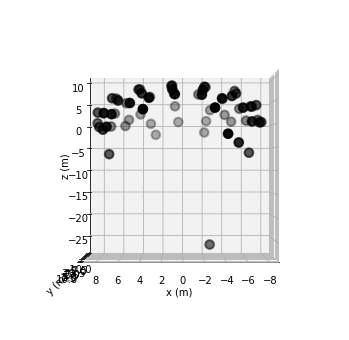

In [46]:
raw.plot_sensors(ch_type = 'eeg', kind = '3d', sphere = 10);

In [11]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 64 items (64 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
>

In [12]:
#ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
#raw_1020 = raw.copy().set_montage(ten_twenty_montage)

In [13]:
#fig = ten_twenty_montage.plot(kind='3d')
#fig.gca().view_init(azim=70, elev=15)
#ten_twenty_montage.plot(kind='topomap', show_names=False)

In [14]:
#raw.filter(1, 20)  #filter frequecies out of (1, 20) range

In [15]:
ica = mne.preprocessing.ICA(n_components = 20, random_state = 0)

<ipython-input-15-29296072f4e4>:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components = 20, random_state = 0)


In [16]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (1.650 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.8s.


<ICA | raw data decomposition, fit (fastica): 245200 samples, 20 components, channels used: "eeg">

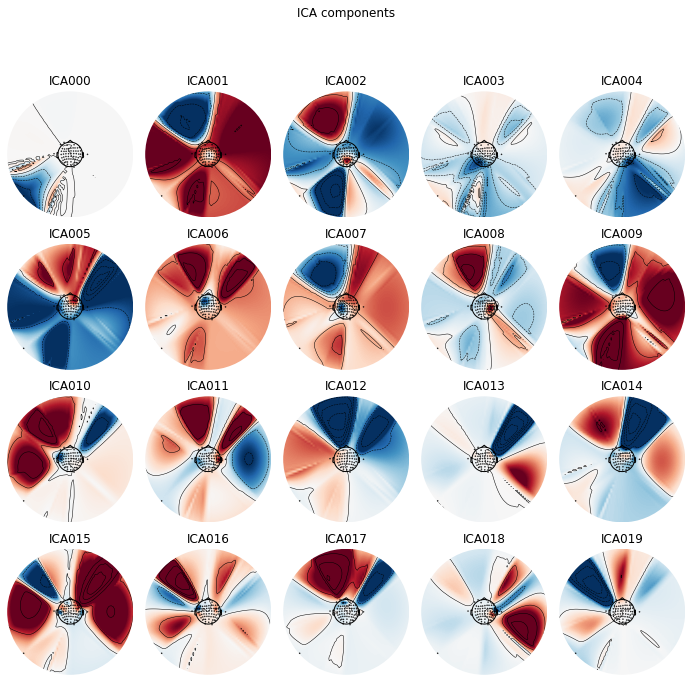

[<MNEFigure size 702x696.24 with 20 Axes>]

In [20]:
ica.plot_components(outlines = 'head', sphere = 10)

In [71]:
ica.exclude = [1, 5, 9]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (3.302 sec)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


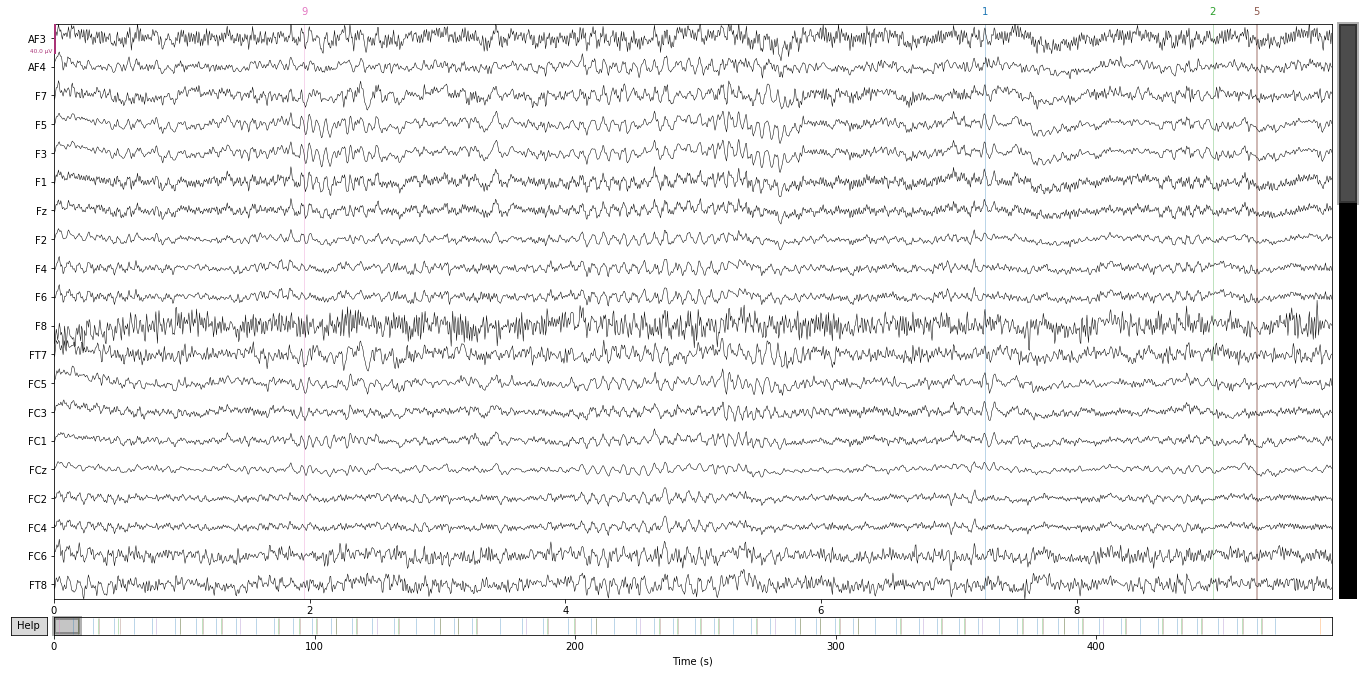

In [72]:
raw_m = ica.apply(raw.copy().filter(1, 50), exclude = ica.exclude)
raw_m.plot();

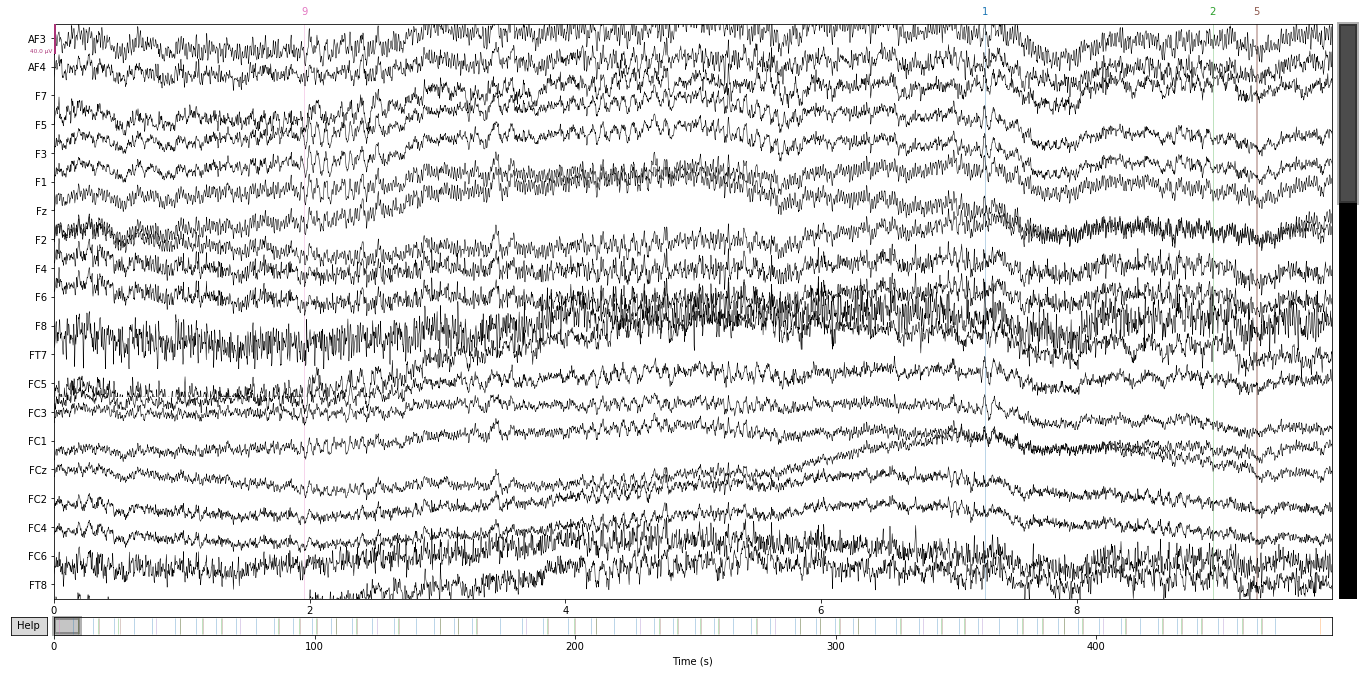

In [73]:
raw.plot();

In [74]:
events[0].shape

(152, 3)

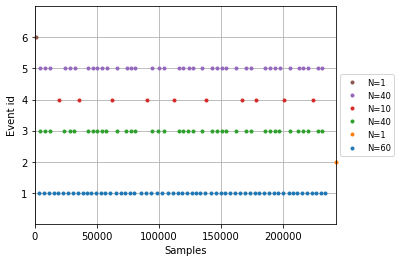

In [75]:
mne.viz.plot_events(events[0]);

In [76]:
epochs = mne.Epochs(raw, events[0], event_id = events[1])

Not setting metadata
Not setting metadata
152 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 152 events and 351 original time points ...
0 bad epochs dropped
Loading data for 152 events and 351 original time points ...
Loading data for 20 events and 351 original time points ...


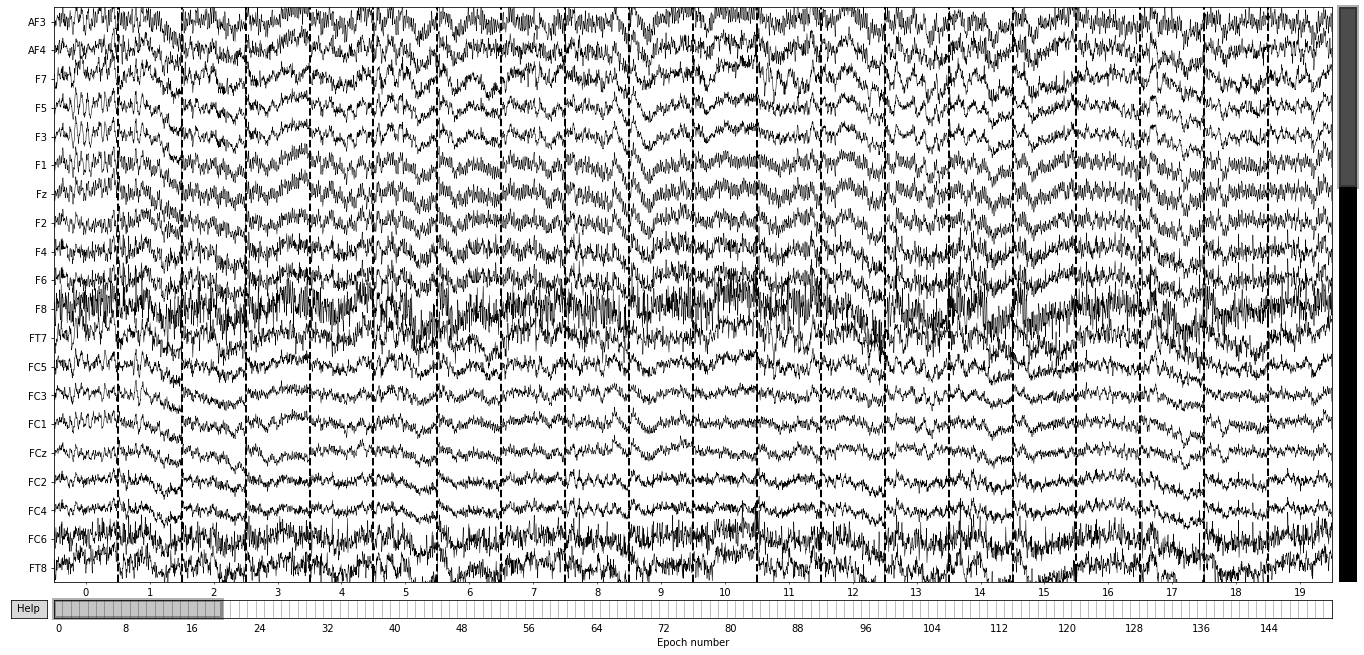

In [77]:
epochs.plot();

Not setting metadata
Not setting metadata
152 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 152 events and 351 original time points ...
0 bad epochs dropped
Loading data for 152 events and 351 original time points ...
Loading data for 20 events and 351 original time points ...


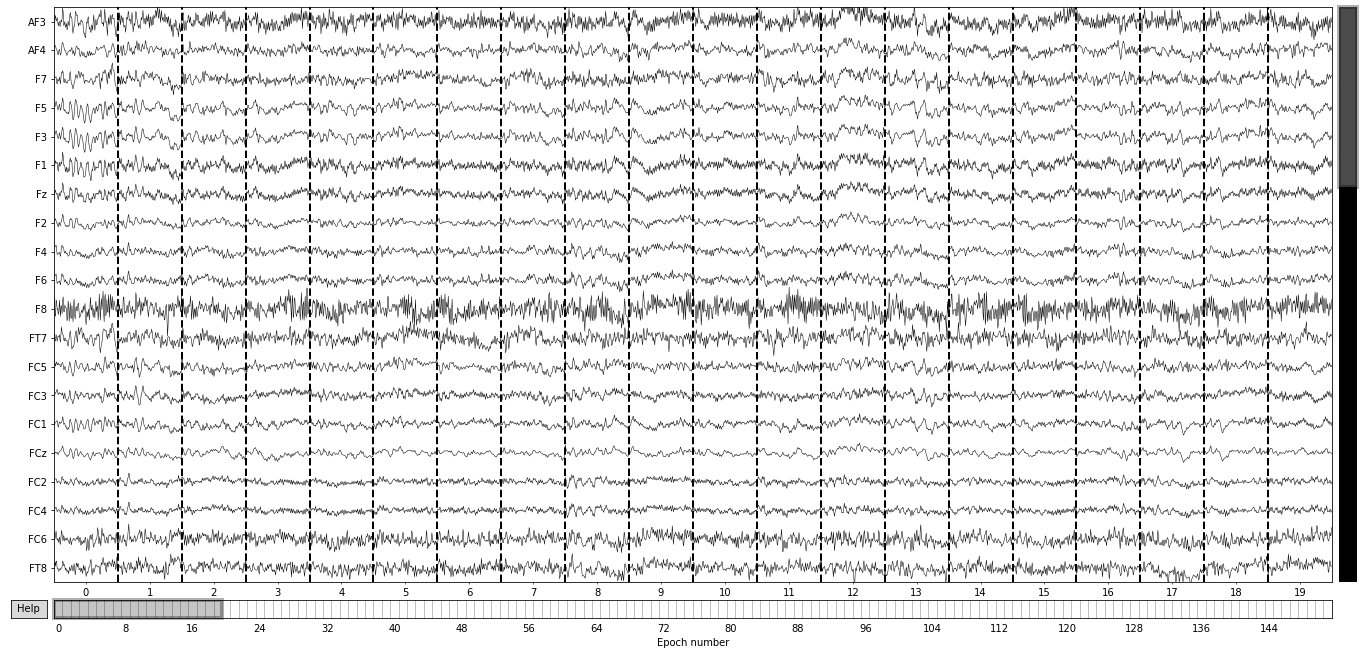

In [78]:
epochs_m = mne.Epochs(raw_m, events[0], event_id = events[1])
epochs_m.plot();

In [82]:
epochs_m.load_data()

Loading data for 152 events and 351 original time points ...


<Epochs |  152 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~26.1 MB, data loaded,
 '1': 60
 '10': 1
 '2': 40
 '4': 10
 '5': 40
 '9': 1>

In [83]:
epochs_m = ica.apply(epochs_m, exclude = ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


<ipython-input-83-bb7ce5945eb7>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_m = ica.apply(epochs_m, exclude = ica.exclude)


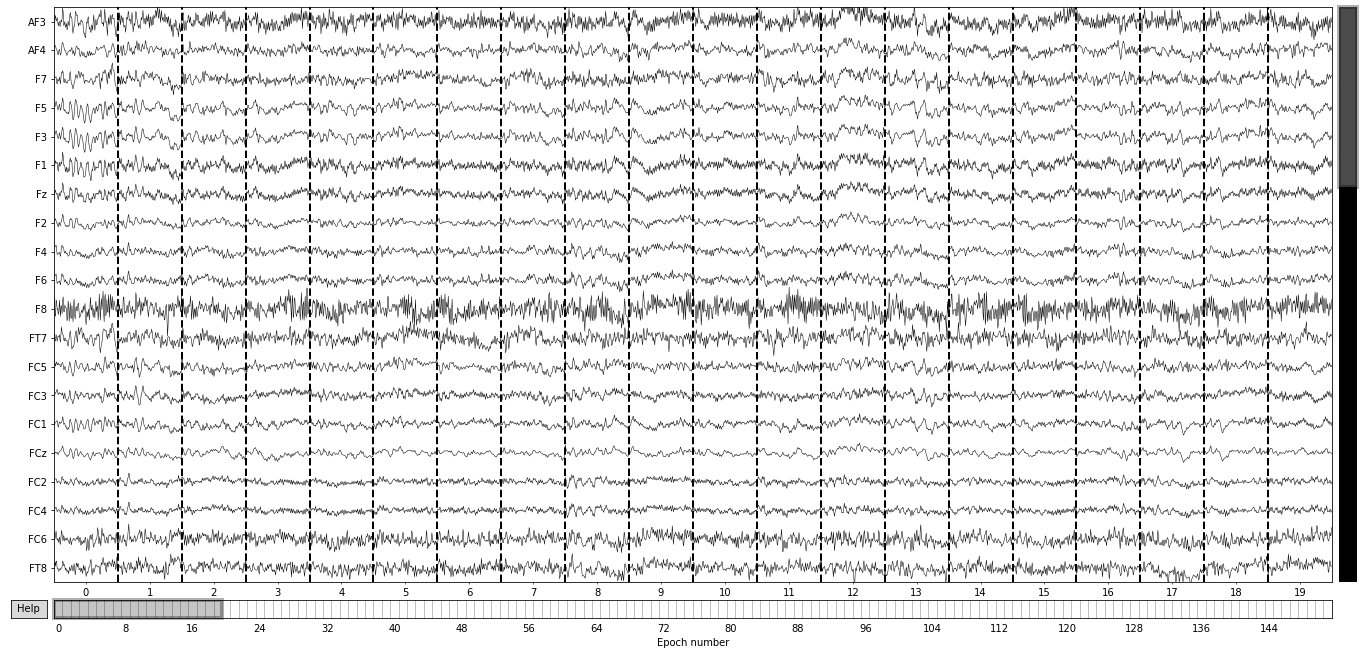

In [84]:
epochs_m.plot();

In [87]:
epochs_m.info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 64 items (64 EEG)
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
>

Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


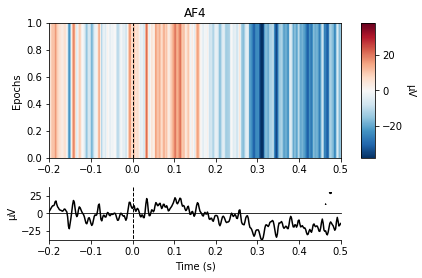

[<Figure size 432x288 with 4 Axes>]

In [92]:
epochs[1].plot_image(picks = [1])

In [ ]:
#epochs_m.save("trialdata-epo.fif")